In [909]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок


data = pd.read_csv('stud_math.csv')
display(data)
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [910]:
# Сразу переименнуем непонятную колонку
data.rename(columns={'studytime, granular': 'granular'}, inplace=True)

# Функции 

In [911]:
# Функция для построения boxplot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 2))
    sns.boxplot(x=column, y='score', data=data)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    display(data.groupby(column)[['score']].count())

# Функция для построения гистрограммы


def get_histogram(column):
    data[column].value_counts(ascending=False).plot(kind='bar',
                                                    grid=True,
                                                    colormap='coolwarm')
    data.score.value_counts(ascending=False)


# Функция для замены  на медиану
def change_none(data, columns_list):
    for column in columns_list:
        data[column] = data[column].apply(lambda x: data[column].median()
                                          if pd.isna(x) == True else x)


# Общая Функция для замены
def change_column(column, old_value, new_value):
    data[column] = data[column].apply(lambda x: new_value if pd.isna(old_value) and pd.isna(x)
                                      else new_value if x == old_value else x)

In [912]:
# Функция для вывода информации
def stats(column):
    dframe = data
    if dframe[column].dtypes in ['int64', 'float64']:
        perc25 = dframe[column].quantile(0.25)
        column_median = dframe[column].median()
        column_mean = round(dframe[column].mean(), 4)
        perc75 = dframe[column].quantile(0.75)
        IQR = dframe[column].quantile(0.75) - dframe[column].quantile(0.25)
        IQR_val = dframe[column].loc[dframe[column].between(
            perc25, perc75)].count()
        IQR_val_percent = round(IQR_val/(dframe[column].count())*100, 2)
        min_point = perc25 - 1.5*IQR
        max_point = perc75 + 1.5*IQR
        stats_range = dframe[column].loc[dframe[column].between(
            min_point, max_point)].count()
        stats_range_percent = round(
            stats_range/(dframe[column].count())*100, 2)
        print('Показатели для -= {} =-:'.format(column), '\n', '\n',
              'Общее количество значений (non-NA/null значений): {} ({})'.format(dframe.shape[0],
                                                                                 dframe[column].count()), '\n',
              'Уникальные значения: {}'.format(
                  list(sorted(dframe[column].unique()))), '\n',
              'Минимум: {}'.format(min(dframe[column])), '\n',
              'Максимум: {}'.format(max(dframe[column])), '\n',
              'Мода: {}'.format(list(dframe[column].mode(dropna=False))), '\n',
              'Медиана: {}'.format(column_median), '\n',
              'Среднее: {}'.format(column_mean), '\n',
              'STD: {}'.format(round(dframe[column].std(), 4)), '\n',
              '25-й перцентиль: {}'.format(perc25), '\n',
              '75-й перцентиль: {}'.format(perc75), '\n',
              'IQR: {0}, кол-во значений: {1}, {2}%'.format(
                  IQR, IQR_val, IQR_val_percent), '\n',
              'Границы выбросов: [{0}, {1}], кол-во значений: {2}, {3}%'.format(min_point, max_point,
                                                                                stats_range,
                                                                                stats_range_percent), '\n',
              'Выбросы слева: {}, количество выбросов: {}'
              .format(list(sorted(dframe[column][dframe[column] < min_point])),
                      len(list(dframe[column][dframe[column] < min_point]))), '\n',
              'Выбросы справа: {}, количество выбросов: {}'
              .format(list(sorted(dframe[column][dframe[column] > max_point])),
                      len(list(dframe[column][dframe[column] > max_point]))), sep='')
    else:
        print('Показатели для -= {} =-:'.format(column))
        display(pd.DataFrame(dframe[column].describe(include=all)))
        pd_object = pd.merge(dframe[column].value_counts(dropna=False).reset_index(),
                             (dframe[column].value_counts(
                                 normalize=True, dropna=False)*100)
                             .reset_index(), on='index')
        pd_object.columns = ['values', 'counts', '%']
        display(pd.DataFrame(pd_object))

# Заменим числовые средними значениями

In [913]:
columns_list_2 = data.select_dtypes(include='number').columns
change_none(data, columns_list_2)

# Заменим номинативным модой

In [914]:
columns_list = data.select_dtypes(exclude=[np.number]).columns
for column in columns_list:
    change_column(column, np.nan, data[column].mode()[0])

# Посмотрим на пропуски в %

In [915]:
for col in data.columns:
    pct_missing = data[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
granular - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
health - 0.0%
absences - 0.0%
score - 0.0%


# Визуализируем

<AxesSubplot:>

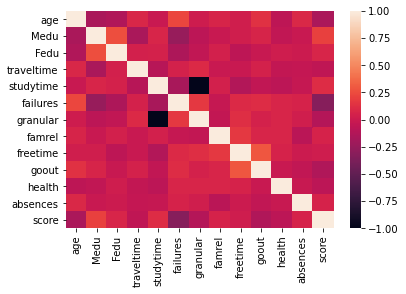

In [916]:
sns.heatmap(data.corr(), vmin=-1, vmax=1)

In [917]:
# Что то интересное с granular и studytime
display(data.groupby('granular')[['studytime']].mean())

,studytime
granular,
-12.0,4.0
-9.0,3.0
-6.0,2.0
-3.0,1.0


In [918]:
# Видно что granular это studytime умноженное на -3
# Удаляем за ненадобностью
data.drop(['granular'], axis=1, inplace=True)

# 1. Посмотрим Список числовых и начнем

In [919]:
display(columns_list_2)
# Можно сразу все вывести, но мне так неудобно

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'granular', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

In [920]:
stats("age")

Показатели для -= age =-:

Общее количество значений (non-NA/null значений): 395 (395)
Уникальные значения: [15, 16, 17, 18, 19, 20, 21, 22]
Минимум: 15
Максимум: 22
Мода: [16]
Медиана: 17.0
Среднее: 16.6962
STD: 1.276
25-й перцентиль: 16.0
75-й перцентиль: 18.0
IQR: 2.0, кол-во значений: 284, 71.9%
Границы выбросов: [13.0, 21.0], кол-во значений: 394, 99.75%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [22], количество выбросов: 1


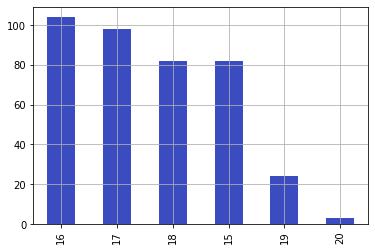

In [921]:
#Убираем выброс
data = data.loc[data.age < 21]
get_histogram("age")

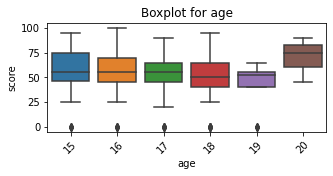

,score
age,
15,82
16,104
17,98
18,82
19,24
20,3


In [922]:
get_boxplot("age")
# Вижу влияние

In [923]:
stats("Medu")

Показатели для -= Medu =-:

Общее количество значений (non-NA/null значений): 393 (393)
Уникальные значения: [0.0, 1.0, 2.0, 3.0, 4.0]
Минимум: 0.0
Максимум: 4.0
Мода: [4.0]
Медиана: 3.0
Среднее: 2.7557
STD: 1.0933
25-й перцентиль: 2.0
75-й перцентиль: 4.0
IQR: 2.0, кол-во значений: 332, 84.48%
Границы выбросов: [-1.0, 7.0], кол-во значений: 393, 100.0%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [], количество выбросов: 0


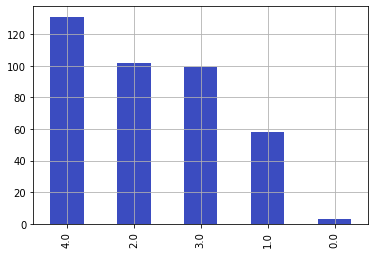

In [924]:
get_histogram("Medu")

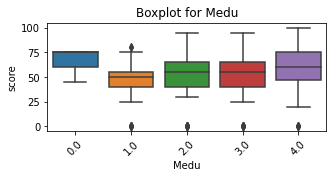

,score
Medu,
0.0,3
1.0,58
2.0,102
3.0,99
4.0,131


In [925]:
get_boxplot("Medu")
# Вижу влияние

In [926]:
stats("Fedu")

Показатели для -= Fedu =-:

Общее количество значений (non-NA/null значений): 393 (393)
Уникальные значения: [0.0, 1.0, 2.0, 3.0, 4.0, 40.0]
Минимум: 0.0
Максимум: 40.0
Мода: [2.0]
Медиана: 2.0
Среднее: 2.5852
STD: 2.1674
25-й перцентиль: 2.0
75-й перцентиль: 3.0
IQR: 1.0, кол-во значений: 226, 57.51%
Границы выбросов: [0.5, 4.5], кол-во значений: 390, 99.24%
Выбросы слева: [0.0, 0.0], количество выбросов: 2
Выбросы справа: [40.0], количество выбросов: 1


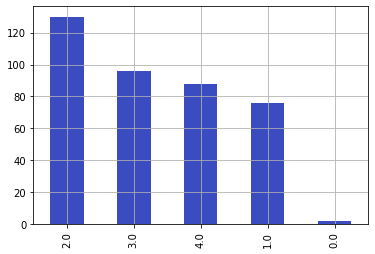

In [927]:
# Неизвестно выброс или ошибка, убираем =)
data = data.loc[data.Fedu < 40.0]
get_histogram("Fedu")

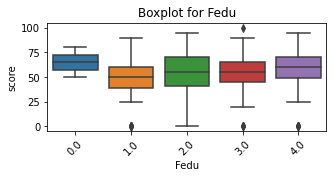

,score
Fedu,
0.0,2
1.0,76
2.0,130
3.0,96
4.0,88


In [928]:
get_boxplot("Fedu")
# Вижу влияние

In [929]:
stats("traveltime")
# Оставим как есть

Показатели для -= traveltime =-:

Общее количество значений (non-NA/null значений): 392 (392)
Уникальные значения: [1.0, 2.0, 3.0, 4.0]
Минимум: 1.0
Максимум: 4.0
Мода: [1.0]
Медиана: 1.0
Среднее: 1.4056
STD: 0.6757
25-й перцентиль: 1.0
75-й перцентиль: 2.0
IQR: 1.0, кол-во значений: 364, 92.86%
Границы выбросов: [-0.5, 3.5], кол-во значений: 385, 98.21%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0], количество выбросов: 7


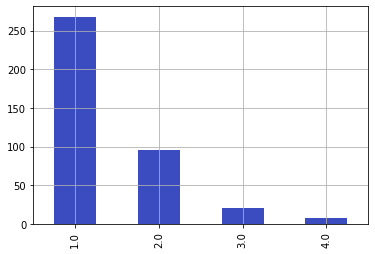

In [930]:
get_histogram("traveltime")

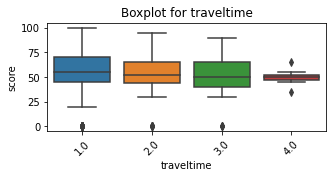

,score
traveltime,
1.0,268
2.0,96
3.0,21
4.0,7


In [931]:
get_boxplot("traveltime")
# Минимальное влияние

In [932]:
stats("studytime")
# Оставим как есть

Показатели для -= studytime =-:

Общее количество значений (non-NA/null значений): 392 (392)
Уникальные значения: [1.0, 2.0, 3.0, 4.0]
Минимум: 1.0
Максимум: 4.0
Мода: [2.0]
Медиана: 2.0
Среднее: 2.0408
STD: 0.8331
25-й перцентиль: 1.0
75-й перцентиль: 2.0
IQR: 1.0, кол-во значений: 302, 77.04%
Границы выбросов: [-0.5, 3.5], кол-во значений: 365, 93.11%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0], количество выбросов: 27


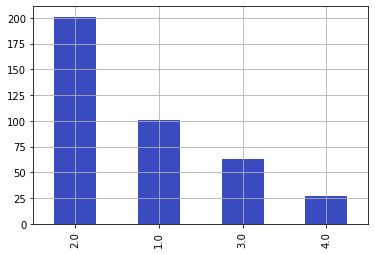

In [933]:
get_histogram("studytime")

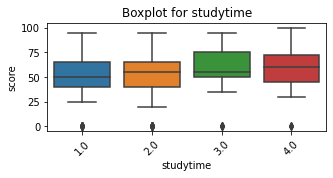

,score
studytime,
1.0,101
2.0,201
3.0,63
4.0,27


In [934]:
get_boxplot("studytime")
# Вижу влияние

In [935]:
stats("failures")
# Оставим как есть

Показатели для -= failures =-:

Общее количество значений (non-NA/null значений): 392 (392)
Уникальные значения: [0.0, 1.0, 2.0, 3.0]
Минимум: 0.0
Максимум: 3.0
Мода: [0.0]
Медиана: 0.0
Среднее: 0.3061
STD: 0.7031
25-й перцентиль: 0.0
75-й перцентиль: 0.0
IQR: 0.0, кол-во значений: 314, 80.1%
Границы выбросов: [0.0, 0.0], кол-во значений: 314, 80.1%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], количество выбросов: 78


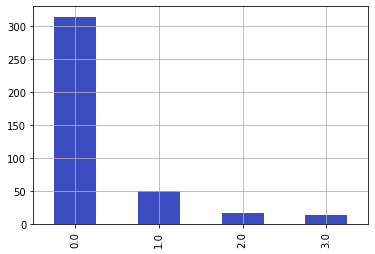

In [936]:
get_histogram("failures")

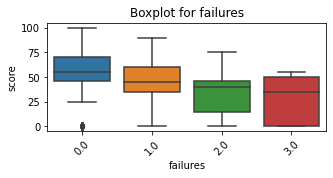

,score
failures,
0.0,314
1.0,49
2.0,16
3.0,13


In [937]:
get_boxplot("failures")
# Вижу влияние

In [938]:
stats("famrel")

Показатели для -= famrel =-:

Общее количество значений (non-NA/null значений): 392 (392)
Уникальные значения: [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Минимум: -1.0
Максимум: 5.0
Мода: [4.0]
Медиана: 4.0
Среднее: 3.9337
STD: 0.8937
25-й перцентиль: 4.0
75-й перцентиль: 4.0
IQR: 0.0, кол-во значений: 209, 53.32%
Границы выбросов: [4.0, 4.0], кол-во значений: 209, 53.32%
Выбросы слева: [-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], количество выбросов: 87
Выбросы справа: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.

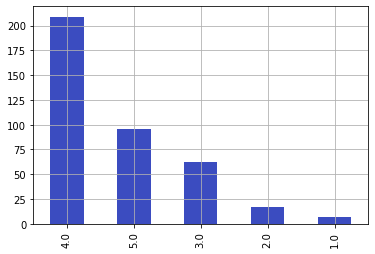

In [939]:
# Неизвестно выброс или ошибка, убираем =)
data = data.loc[data.famrel > 0]
get_histogram("famrel")

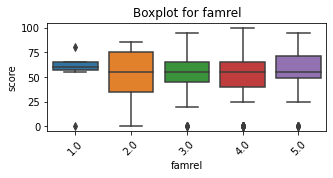

,score
famrel,
1.0,7
2.0,17
3.0,62
4.0,209
5.0,96


In [940]:
get_boxplot("famrel")
# Вижу влияние

In [941]:
stats("freetime")

Показатели для -= freetime =-:

Общее количество значений (non-NA/null значений): 391 (391)
Уникальные значения: [1.0, 2.0, 3.0, 4.0, 5.0]
Минимум: 1.0
Максимум: 5.0
Мода: [3.0]
Медиана: 3.0
Среднее: 3.2251
STD: 0.9769
25-й перцентиль: 3.0
75-й перцентиль: 4.0
IQR: 1.0, кол-во значений: 275, 70.33%
Границы выбросов: [1.5, 5.5], кол-во значений: 373, 95.4%
Выбросы слева: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], количество выбросов: 18
Выбросы справа: [], количество выбросов: 0


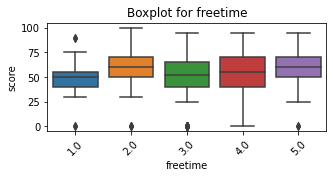

,score
freetime,
1.0,18
2.0,61
3.0,164
4.0,111
5.0,37


In [942]:
get_boxplot("freetime")
# Вижу влияние

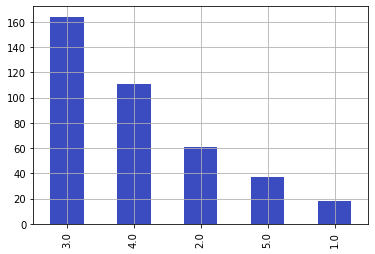

In [943]:
get_histogram("freetime")

In [944]:
stats("goout")

Показатели для -= goout =-:

Общее количество значений (non-NA/null значений): 391 (391)
Уникальные значения: [1.0, 2.0, 3.0, 4.0, 5.0]
Минимум: 1.0
Максимум: 5.0
Мода: [3.0]
Медиана: 3.0
Среднее: 3.1049
STD: 1.1033
25-й перцентиль: 2.0
75-й перцентиль: 4.0
IQR: 2.0, кол-во значений: 317, 81.07%
Границы выбросов: [-1.0, 7.0], кол-во значений: 391, 100.0%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [], количество выбросов: 0


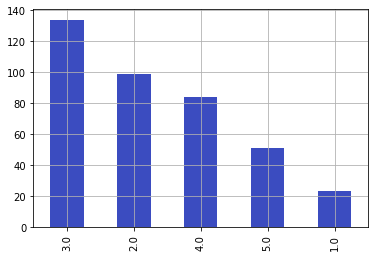

In [945]:
get_histogram("goout")

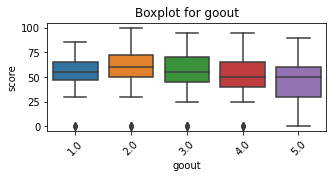

,score
goout,
1.0,23
2.0,99
3.0,134
4.0,84
5.0,51


In [946]:
get_boxplot("goout")
# Вижу влияние

In [947]:
stats("health")

Показатели для -= health =-:

Общее количество значений (non-NA/null значений): 391 (391)
Уникальные значения: [1.0, 2.0, 3.0, 4.0, 5.0]
Минимум: 1.0
Максимум: 5.0
Мода: [5.0]
Медиана: 4.0
Среднее: 3.5524
STD: 1.3706
25-й перцентиль: 3.0
75-й перцентиль: 5.0
IQR: 2.0, кол-во значений: 302, 77.24%
Границы выбросов: [0.0, 8.0], кол-во значений: 391, 100.0%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [], количество выбросов: 0


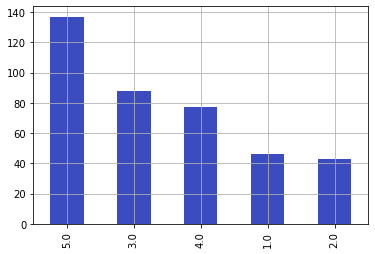

In [948]:
get_histogram("health")

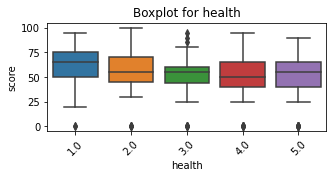

,score
health,
1.0,46
2.0,43
3.0,88
4.0,77
5.0,137


In [949]:
get_boxplot("health")
# Вижу влияние

In [950]:
stats('absences')
# Явные выбросы
data = data.loc[data.absences < 212.0]

Показатели для -= absences =-:

Общее количество значений (non-NA/null значений): 391 (391)
Уникальные значения: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0]
Минимум: 0.0
Максимум: 385.0
Мода: [0.0]
Медиана: 4.0
Среднее: 7.1586
STD: 23.2218
25-й перцентиль: 0.0
75-й перцентиль: 8.0
IQR: 8.0, кол-во значений: 308, 78.77%
Границы выбросов: [-12.0, 20.0], кол-во значений: 374, 95.65%
Выбросы слева: [], количество выбросов: 0
Выбросы справа: [21.0, 22.0, 22.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0], количество выбросов: 17


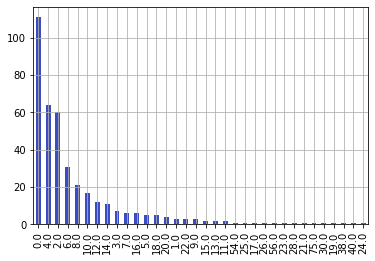

In [951]:
get_histogram("absences")

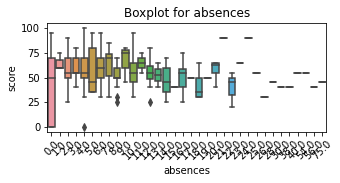

,score
absences,
0.0,111
1.0,3
2.0,60
3.0,7
4.0,64
5.0,5
6.0,31
7.0,6
8.0,21


In [952]:
get_boxplot("absences")
# Вижу явную связь

In [953]:
stats("score")

Показатели для -= score =-:

Общее количество значений (non-NA/null значений): 389 (389)
Уникальные значения: [0.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
Минимум: 0.0
Максимум: 100.0
Мода: [50.0]
Медиана: 55.0
Среднее: 52.3265
STD: 22.821
25-й перцентиль: 45.0
75-й перцентиль: 70.0
IQR: 25.0, кол-во значений: 220, 56.56%
Границы выбросов: [7.5, 107.5], кол-во значений: 352, 90.49%
Выбросы слева: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], количество выбросов: 37
Выбросы справа: [], количество выбросов: 0


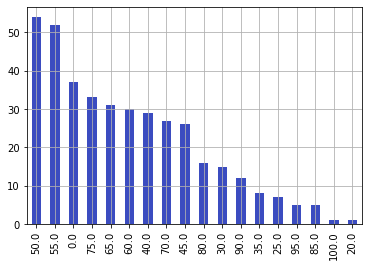

In [954]:
get_histogram("score")

In [955]:
# Для наглядности, составим таблицу корреляции поотношению к переменной "score"
data_corrwith = data.copy()
data_corrwith = data_corrwith.corrwith(data.score)
data_corrwith.sort_values(ascending=False)

score         1.000000
Medu          0.206466
Fedu          0.115501
studytime     0.108993
famrel        0.063018
absences      0.031446
freetime      0.024890
traveltime   -0.059176
health       -0.074008
goout        -0.118350
age          -0.142008
failures     -0.324980
dtype: float64

# Удалю те которые считаю наименее полезными

In [956]:
# Удалим лишнее
data.drop(['traveltime'], axis=1, inplace=True)
data.drop(['famrel'], axis=1, inplace=True)

# Пройдемся по номинативным

In [957]:
display(columns_list)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [958]:
stats("school")
# Большинство учится в GP

Показатели для -= school =-:


,school
count,389
unique,2
top,GP
freq,345


,values,counts,%
0,GP,345,88.688946
1,MS,44,11.311054


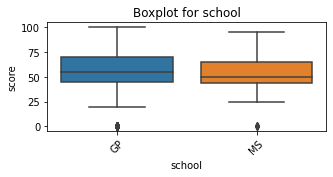

,score
school,
GP,345
MS,44


In [959]:
get_boxplot("school")
# Среднии оценки выше GP
# Влияние оценок от выбора школы - небольшое

In [960]:
stats("sex")
# Небольшое преобладание женского пола
# Среднии оценки женщин выше

Показатели для -= sex =-:


,sex
count,389
unique,2
top,F
freq,205


,values,counts,%
0,F,205,52.699229
1,M,184,47.300771


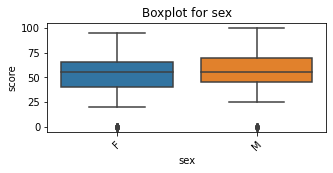

,score
sex,
F,205
M,184


In [961]:
get_boxplot("sex")
# Влияние медианных оценок от пола не наблюдаю

In [962]:
stats("address")
# У городских жителей оценки выше

Показатели для -= address =-:


,address
count,389
unique,2
top,U
freq,307


,values,counts,%
0,U,307,78.920308
1,R,82,21.079692


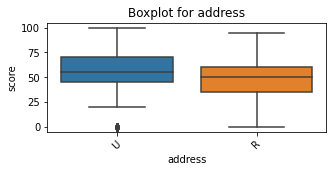

,score
address,
R,82
U,307


In [963]:
get_boxplot("address")
# Небольшое влияние оценок от местажительства

In [964]:
stats("famsize")
# Семей с более 3 человек больше

Показатели для -= famsize =-:


,famsize
count,389
unique,2
top,GT3
freq,283


,values,counts,%
0,GT3,283,72.750643
1,LE3,106,27.249357


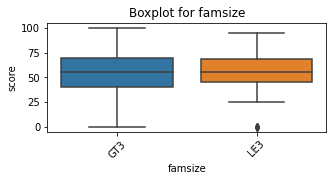

,score
famsize,
GT3,283
LE3,106


In [965]:
get_boxplot("famsize")
# Влияние не наблюдаю

In [966]:
stats("Pstatus")
# Живущих вместе родителей больше

Показатели для -= Pstatus =-:


,Pstatus
count,389
unique,2
top,T
freq,354


,values,counts,%
0,T,354,91.002571
1,A,35,8.997429


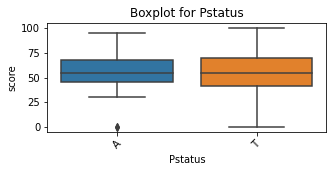

,score
Pstatus,
A,35
T,354


In [967]:
get_boxplot("Pstatus")
# Влияние не наблюдаю

In [968]:
stats("Mjob")

Показатели для -= Mjob =-:


,Mjob
count,389
unique,5
top,other
freq,151


,values,counts,%
0,other,151,38.817481
1,services,93,23.907455
2,at_home,58,14.910026
3,teacher,55,14.138817
4,health,32,8.226221


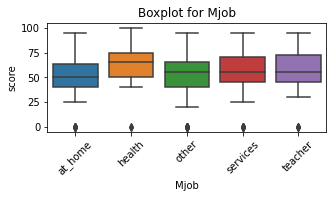

,score
Mjob,
at_home,58
health,32
other,151
services,93
teacher,55


In [969]:
get_boxplot("Mjob")
# Наблюдаю влияние оценок от работы матерей врачами и дома

In [970]:
stats("Fjob")

Показатели для -= Fjob =-:


,Fjob
count,389
unique,5
top,other
freq,231


,values,counts,%
0,other,231,59.383033
1,services,99,25.449871
2,teacher,28,7.197943
3,at_home,16,4.113111
4,health,15,3.856041


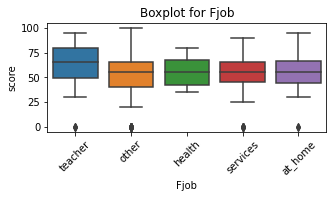

,score
Fjob,
at_home,16
health,15
other,231
services,99
teacher,28


In [971]:
get_boxplot("Fjob")
# Сильное влияние если отец работает учителем

In [972]:
stats("reason")

Показатели для -= reason =-:


,reason
count,389
unique,4
top,course
freq,152


,values,counts,%
0,course,152,39.074550
1,home,103,26.478149
2,reputation,102,26.221080
3,other,32,8.226221


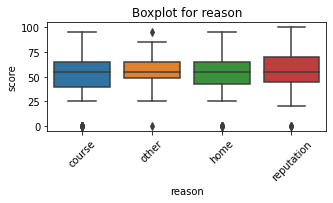

,score
reason,
course,152
home,103
other,32
reputation,102


In [973]:
get_boxplot("reason")
# Влияние на усредненные не наблюдаю

In [974]:
stats("guardian")

Показатели для -= guardian =-:


,guardian
count,389
unique,3
top,mother
freq,276


,values,counts,%
0,mother,276,70.951157
1,father,85,21.850900
2,other,28,7.197943


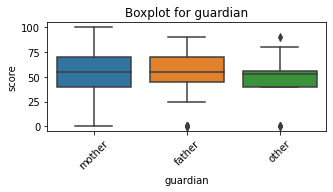

,score
guardian,
father,85
mother,276
other,28


In [975]:
get_boxplot("guardian")
# Влияние не наблюдаю

In [976]:
stats("schoolsup")

Показатели для -= schoolsup =-:


,schoolsup
count,389
unique,2
top,no
freq,339


,values,counts,%
0,no,339,87.14653
1,yes,50,12.85347


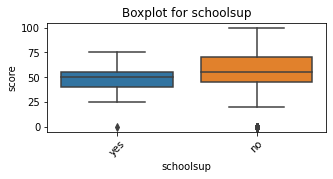

,score
schoolsup,
no,339
yes,50


In [977]:
get_boxplot("schoolsup")
# У тех у кого нет нужды в поддержке оценки выше

In [978]:
stats("paid")

Показатели для -= paid =-:


,paid
count,389
unique,2
top,no
freq,236


,values,counts,%
0,no,236,60.66838
1,yes,153,39.33162


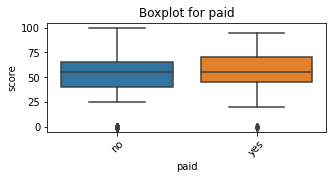

,score
paid,
no,236
yes,153


In [979]:
get_boxplot("paid")
# Влияние не наблюдаю

In [980]:
stats("activities")

Показатели для -= activities =-:


,activities
count,389
unique,2
top,yes
freq,208


,values,counts,%
0,yes,208,53.470437
1,no,181,46.529563


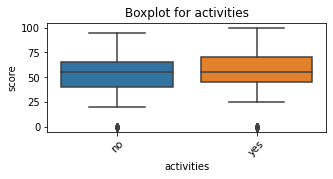

,score
activities,
no,181
yes,208


In [981]:
get_boxplot("activities")
# Влияние не наблюдаю

In [982]:
stats("nursery")

Показатели для -= nursery =-:


,nursery
count,389
unique,2
top,yes
freq,313


,values,counts,%
0,yes,313,80.462725
1,no,76,19.537275


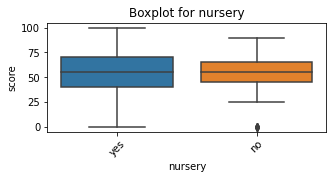

,score
nursery,
no,76
yes,313


In [983]:
get_boxplot("nursery")
# Влияние не наблюдаю

In [984]:
stats("higher")

Показатели для -= higher =-:


,higher
count,389
unique,2
top,yes
freq,371


,values,counts,%
0,yes,371,95.372751
1,no,18,4.627249


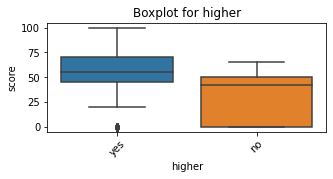

,score
higher,
no,18
yes,371


In [985]:
get_boxplot("higher")
# Наблюдаю влияние

In [986]:
stats("internet")
# При наличии интернета оценки выше

Показатели для -= internet =-:


,internet
count,389
unique,2
top,yes
freq,335


,values,counts,%
0,yes,335,86.118252
1,no,54,13.881748


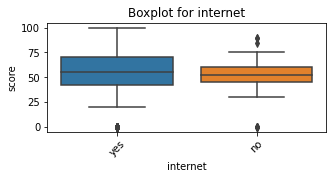

,score
internet,
no,54
yes,335


In [987]:
get_boxplot("internet")
# Наблюдаю влияние

In [988]:
stats("romantic")

Показатели для -= romantic =-:


,romantic
count,389
unique,2
top,no
freq,266


,values,counts,%
0,no,266,68.380463
1,yes,123,31.619537


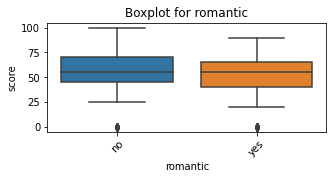

,score
romantic,
no,266
yes,123


In [989]:
get_boxplot("romantic")
# Не вижу влияние

In [990]:
def get_stat_dif(column):
    cols = data.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
        else:
            print('Статистически значимые различия для колонки не найдены')
        break


for col in columns_list:
    get_stat_dif(col)

Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены


In [991]:
# Удалим лишнее
data.drop(['Pstatus'], axis=1, inplace=True)
data.drop(['sex'], axis=1, inplace=True)
data.drop(['famsize'], axis=1, inplace=True)
data.drop(['guardian'], axis=1, inplace=True)
data.drop(['paid'], axis=1, inplace=True)
data.drop(['activities'], axis=1, inplace=True)
data.drop(['nursery'], axis=1, inplace=True)
data.drop(['romantic'], axis=1, inplace=True)

In [992]:
# Основа для дальнейшей работы
data.columns

Index(['school', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'studytime', 'failures', 'schoolsup', 'famsup', 'higher', 'internet',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

# В результате EDA для анализа влияния параметров учащихся 
# на  оценку по математике  были получены следующие выводы:
## 1.На оценку по математике более менее значительно влияют следующие факторы:
###  - school', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
###  - studytime', 'failures', 'schoolsup', 'famsup', 'higher', 'internet',
###  - 'freetime', 'goout', 'health', 'absences', 
## 2.Есть положительна корреляция параметров по отношению к 'score'
### - Medu          0.206466
### - Fedu          0.115501
### - studytime     0.108993
### - famrel        0.063018
### - absences      0.031446
### - freetime      0.024890 
##  но она низкая

# 3.Тест Стьюдента не дал нам никаких результатов
# - или скорее всего он показал что нужен другой тест
# - хотя я уверен  что нужен другой способ замены...
# 4.В данных было достаточно  пустых значений
# 5.Встречались выбросы в age и absences.
# 6.Ошибки или выбросы в famrel и Fedu
# 7.Есть явная связь между score  и absences